<a href="https://colab.research.google.com/github/basharbayatna/Prediction-Of-Product-Sales/blob/main/Copy_of_Prediction_Of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction Of Product Sale
- Author: Bashar Bayatna
## Project Overview

## Load and Inspect Data




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
url = '/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'

df = pd.read_csv(url)

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Clean Data


In [ ]:
df.shape

(8523, 12)

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
df.dtypes

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [ ]:
duplecated_rows = df.duplicated(keep = False)
duplecated_rows.sum()


np.int64(0)

In [ ]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
df.isna().sum()/len(df)*100

,0
Item_Identifier,0.000000
Item_Weight,17.165317
Item_Fat_Content,0.000000
Item_Visibility,0.000000
Item_Type,0.000000
Item_MRP,0.000000
Outlet_Identifier,0.000000
Outlet_Establishment_Year,0.000000
Outlet_Size,28.276428
Outlet_Location_Type,0.000000


In [ ]:
object_col = df.select_dtypes('object').columns
df[object_col].isna().sum()

,0
Item_Identifier,0
Item_Fat_Content,0
Item_Type,0
Outlet_Identifier,0
Outlet_Size,2410
Outlet_Location_Type,0
Outlet_Type,0


In [ ]:
df['Outlet_Size'] = df['Outlet_Size'].fillna('MISSING')
df['Outlet_Size'].value_counts(dropna=False)

,count
Outlet_Size,
Medium,2793
MISSING,2410
Small,2388
High,932


In [ ]:
number_col = df.select_dtypes('number').columns
number_col

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
df['Item_Weight'] = df['Item_Weight'].fillna(-1)
df['Item_Weight'].isna().sum()

np.int64(0)

In [ ]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [ ]:
for i in object_col:
  print(f'Value Count for {i}')
  print(df[i]. value_counts())
  print('\n')
  print('\n')

Value Count for Item_Identifier
Item_Identifier
FDW13    10
FDG33    10
FDX31     9
FDT07     9
NCY18     9
         ..
FDO33     1
FDK57     1
FDT35     1
FDN52     1
FDE52     1
Name: count, Length: 1559, dtype: int64




Value Count for Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64




Value Count for Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64




Value Count for Outlet_Identifier
Outlet_Identifier
OUT027    935
OUT0

In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')

df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [ ]:
df['Item_Type'] = df['Item_Type'].replace('Breads', 'Baking Goods')
df['Item_Type'] = df['Item_Type'].replace('Starchy Foods', 'Baking Goods')

df['Item_Type'].value_counts()

,count
Item_Type,
Fruits and Vegetables,1232
Snack Foods,1200
Baking Goods,1047
Household,910
Frozen Foods,856
Dairy,682
Canned,649
Health and Hygiene,520
Soft Drinks,445


In [ ]:
df[number_col].describe()



,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,-1.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,MISSING,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,MISSING,Tier 2,Supermarket Type1,4710.5350


## Exloratory Data Analysis


-We will use histogram to view the distribution of numarical features in the dataset

In [ ]:
df[number_col]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


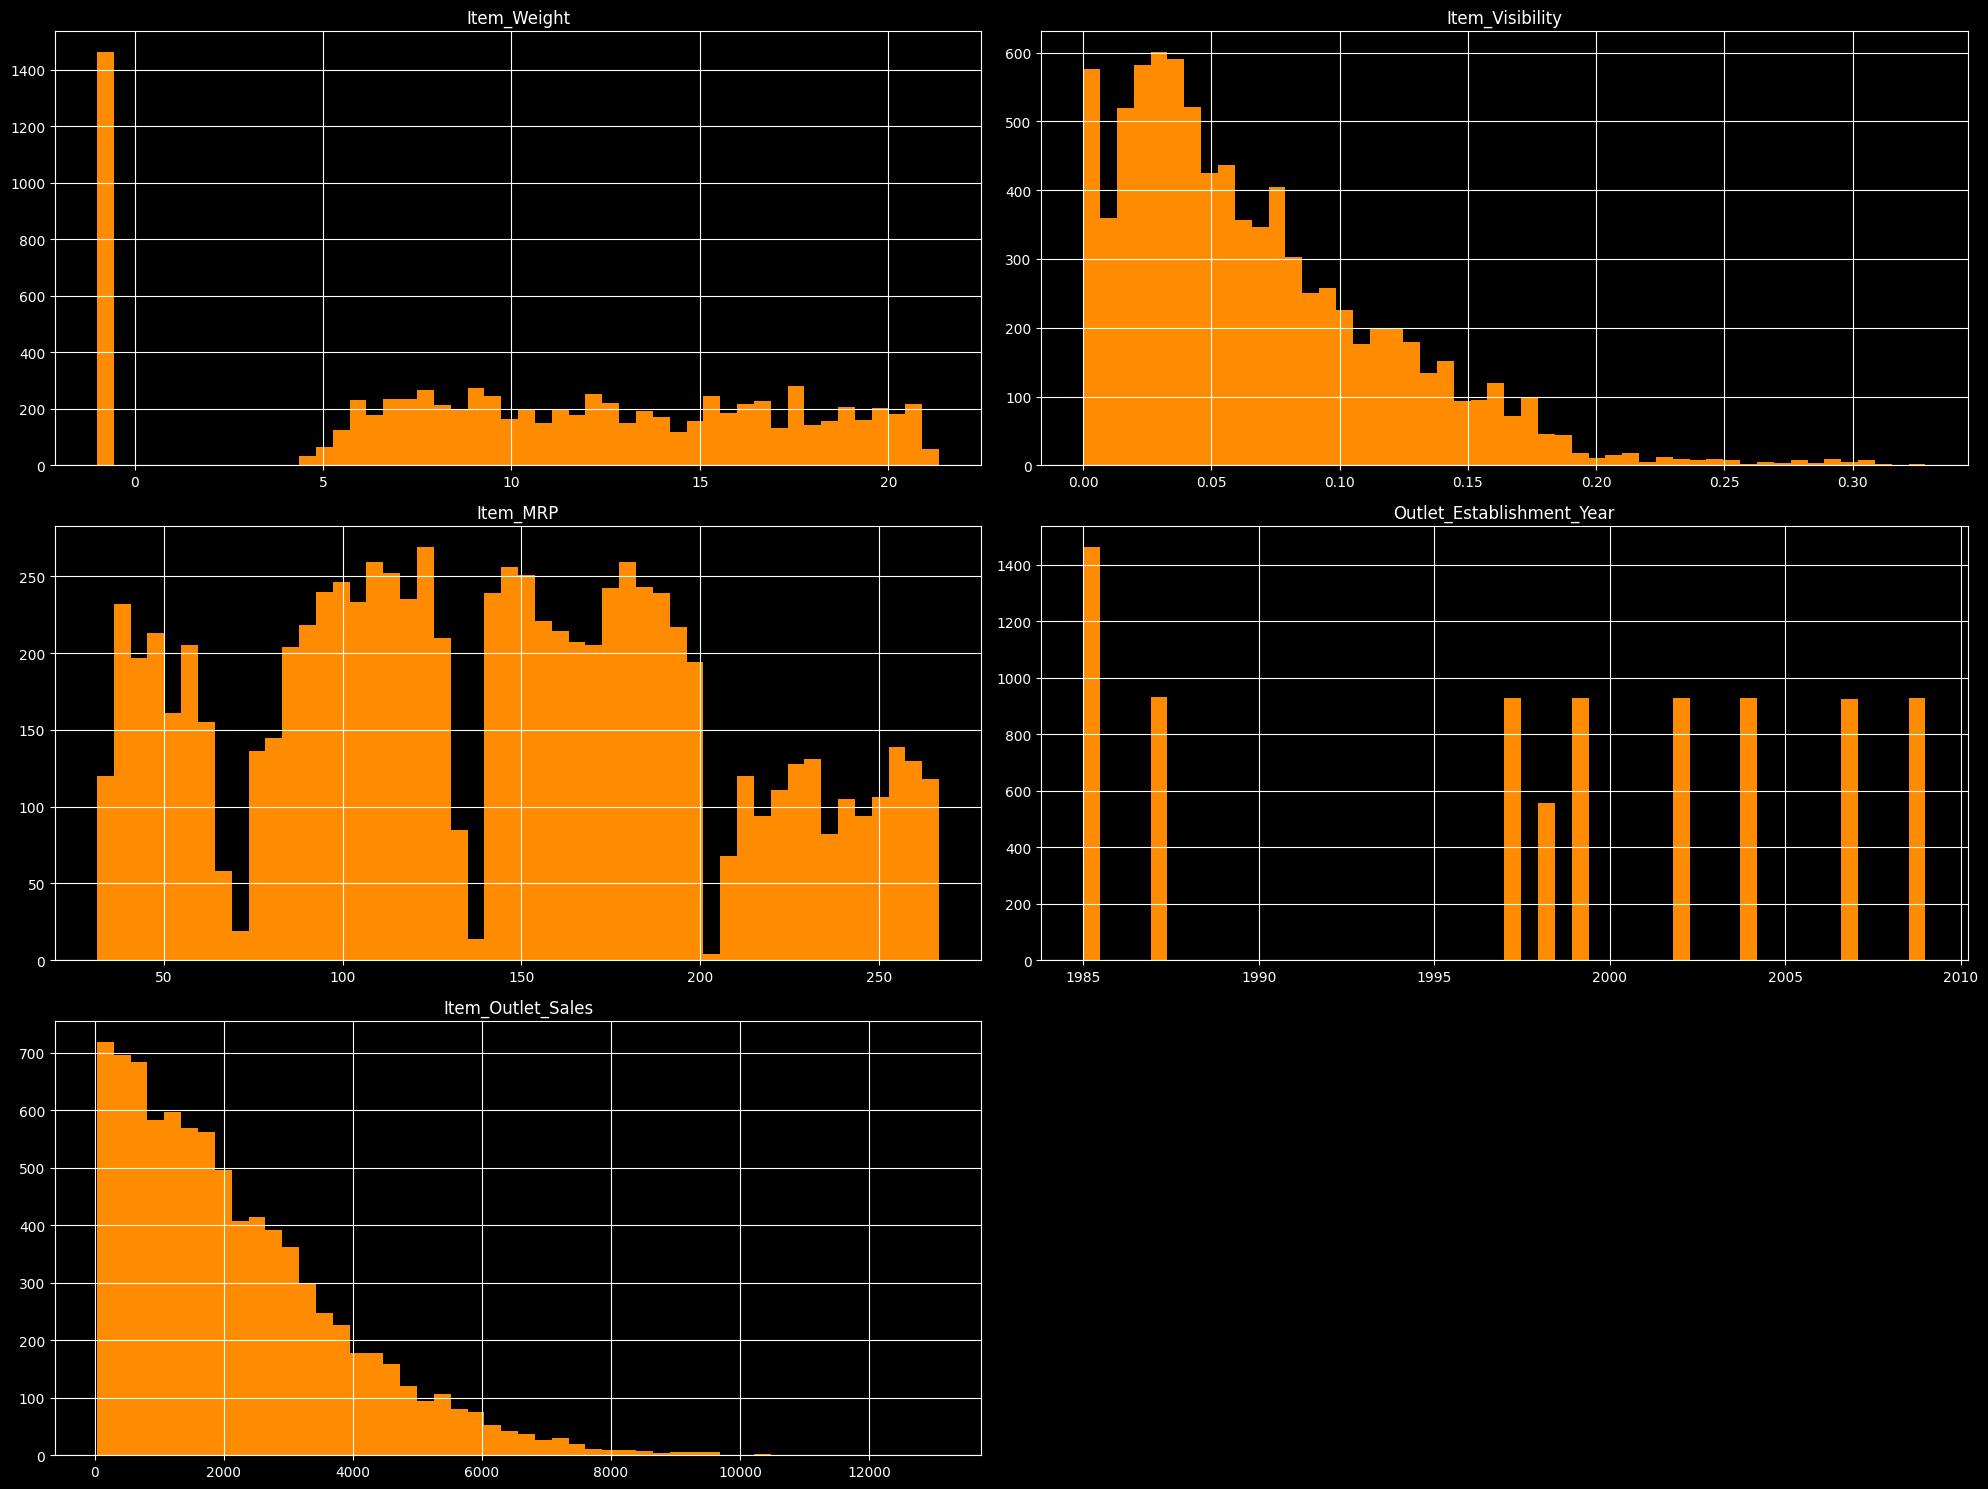

In [ ]:
plt.style.use("dark_background")

df.hist(figsize=(20, 15), bins=50, color='#FF8C00')
plt.tight_layout()


-Now we will dig deeper and see every feature on its own

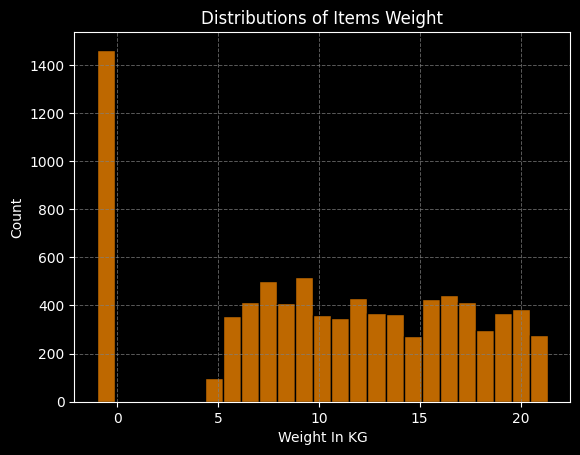

In [ ]:

plt.style.use("dark_background")

ax = sns.histplot(
    data=df,
    x='Item_Weight',
    color='#FF8C00',
    edgecolor='black'
)

ax.set(
    title='Distributions of Items Weight',
    xlabel='Weight In KG'
)

ax.grid(True, color='gray', linestyle='--', linewidth=0.7, alpha=0.7)

plt.show()


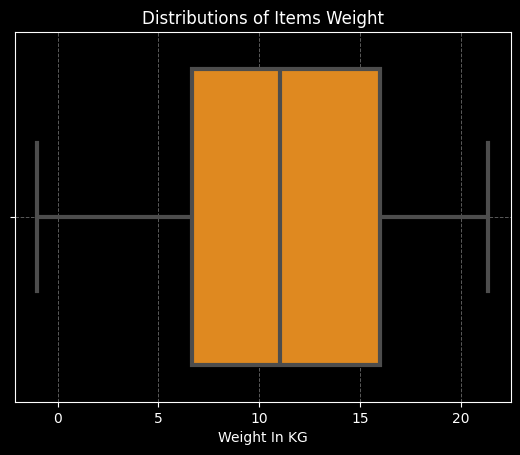

In [ ]:

plt.style.use("dark_background")

flier_props = dict(marker='o', markersize=8, markerfacecolor='red', markeredgewidth=2)

ax = sns.boxplot(
    data=df,
    x='Item_Weight',
    color='#FF8C00',
    linewidth=3,
    fliersize=8,
    flierprops=flier_props
)

ax.set(
    title='Distributions of Items Weight',
    xlabel='Weight In KG'
)

ax.title.set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

ax.tick_params(colors='white')

ax.grid(True, color='gray', linestyle='--', linewidth=0.7, alpha=0.7)

plt.show()


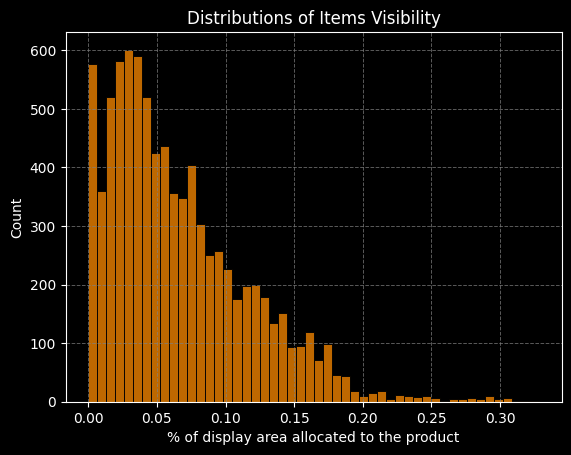

In [ ]:


plt.style.use("dark_background")

ax = sns.histplot(
    data=df,
    x='Item_Visibility',
    color='#FF8C00',
    edgecolor='black'
)

ax.set(
    title='Distributions of Items Visibility',
    xlabel='% of display area allocated to the product'
)

ax.grid(True, color='gray', linestyle='--', linewidth=0.7, alpha=0.7)

plt.show()



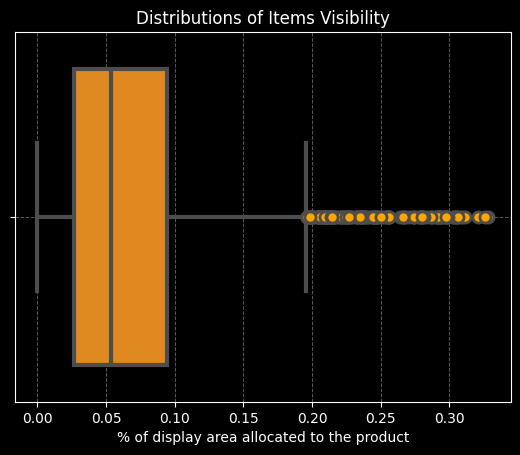

In [ ]:

plt.style.use("dark_background")

flier_props = dict(marker='o', markersize=8, markerfacecolor='#FFA500', markeredgewidth=2)

ax = sns.boxplot(
    data=df,
    x='Item_Visibility',
    color='#FF8C00',
    linewidth=3,
    flierprops=flier_props
)

ax.set(
    title='Distributions of Items Visibility',
    xlabel='% of display area allocated to the product'
)

ax.title.set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

ax.tick_params(colors='white')


ax.grid(True, color='gray', linestyle='--', linewidth=0.7, alpha=0.7)

plt.show()


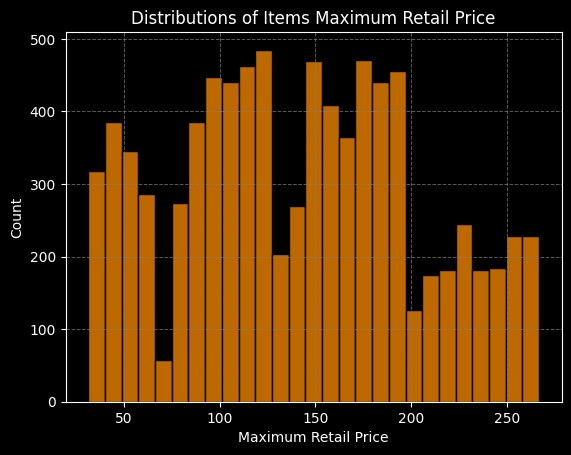

In [ ]:

plt.style.use("dark_background")

ax = sns.histplot(
    data=df,
    x='Item_MRP',
    color='#FF8C00',
    edgecolor='black'
)

ax.set(
    title='Distributions of Items Maximum Retail Price',
    xlabel='Maximum Retail Price'
)

ax.grid(True, color='gray', linestyle='--', linewidth=0.7, alpha=0.7)

plt.show()


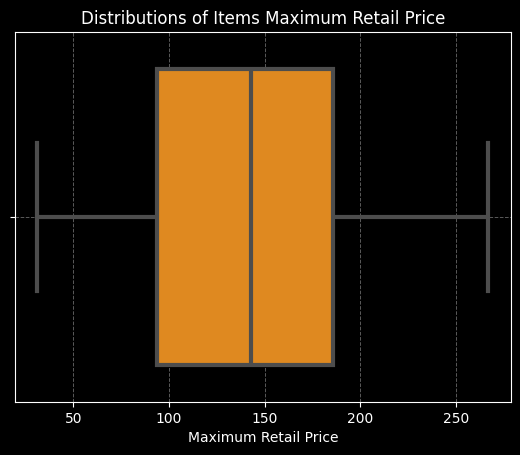

In [ ]:

plt.style.use("dark_background")

flier_props = dict(marker='o', markersize=8, markerfacecolor='#FF8C00', markeredgewidth=2)

ax = sns.boxplot(
    data=df,
    x='Item_MRP',
    color='#FF8C00',
    linewidth=3,
    flierprops=flier_props
)

ax.set(
    title='Distributions of Items Maximum Retail Price',
    xlabel='Maximum Retail Price'
)

ax.title.set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(colors='white')
ax.grid(True, color='gray', linestyle='--', linewidth=0.7, alpha=0.7)

plt.show()


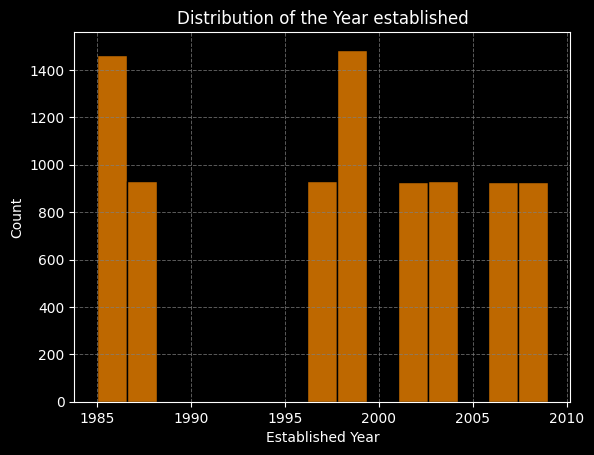

In [ ]:

plt.style.use("dark_background")

ax = sns.histplot(
    data=df,
    x='Outlet_Establishment_Year',
    color='#FF8C00',
    edgecolor='black'
)

ax.set(
    title='Distribution of the Year established',
    xlabel='Established Year'
)

ax.grid(True, color='gray', linestyle='--', linewidth=0.7, alpha=0.7)

plt.show()



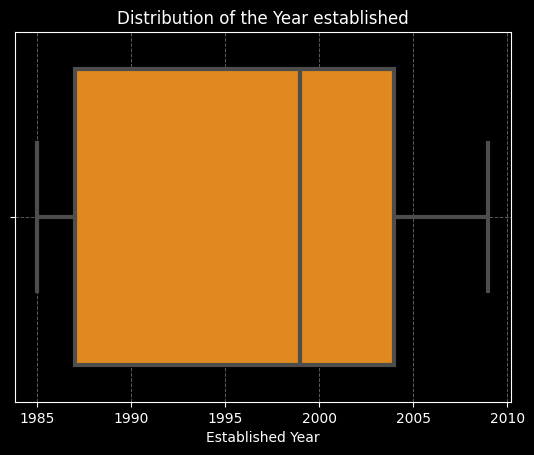

In [ ]:
plt.style.use("dark_background")

flier_props = dict(marker='o', markersize=8, markerfacecolor='#FF8C00', markeredgewidth=2)

ax = sns.boxplot(
    data=df,
    x='Outlet_Establishment_Year',
    color='#FF8C00',
    linewidth=3,
    flierprops=flier_props
)

ax.set(
    title='Distribution of the Year established',
    xlabel='Established Year'
)

ax.title.set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(colors='white')
ax.grid(True, color='gray', linestyle='--', linewidth=0.7, alpha=0.7)

plt.show()


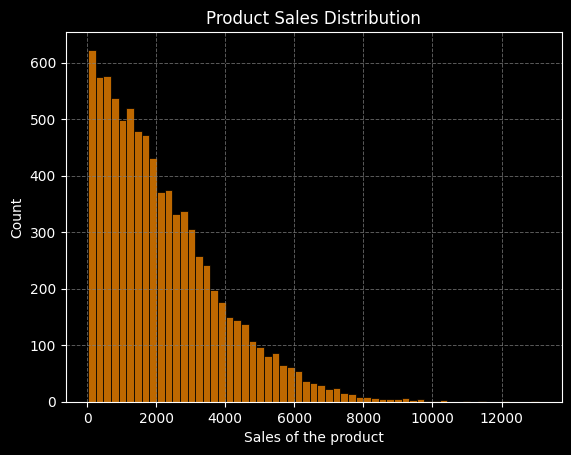

In [ ]:

plt.style.use("dark_background")

ax = sns.histplot(
    data=df,
    x='Item_Outlet_Sales',
    color='#FF8C00',
    edgecolor='black'
)

ax.set(
    title='Product Sales Distribution',
    xlabel='Sales of the product'
)

ax.grid(True, color='gray', linestyle='--', linewidth=0.7, alpha=0.7)

plt.show()


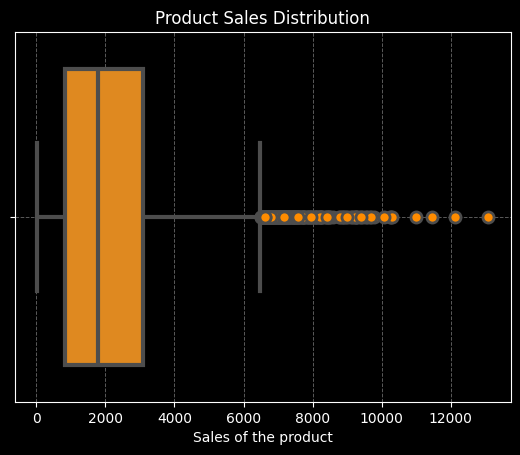

In [ ]:
plt.style.use("dark_background")

flier_props = dict(marker='o', markersize=8, markerfacecolor='#FF8C00', markeredgewidth=2)

ax = sns.boxplot(
    data=df,
    x='Item_Outlet_Sales',
    color='#FF8C00',
    linewidth=3,
    flierprops=flier_props
)

ax.set(
    title='Product Sales Distribution',
    xlabel='Sales of the product'
)

ax.title.set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(colors='white')
ax.grid(True, color='gray', linestyle='--', linewidth=0.7, alpha=0.7)

plt.show()

In [ ]:
object_col

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

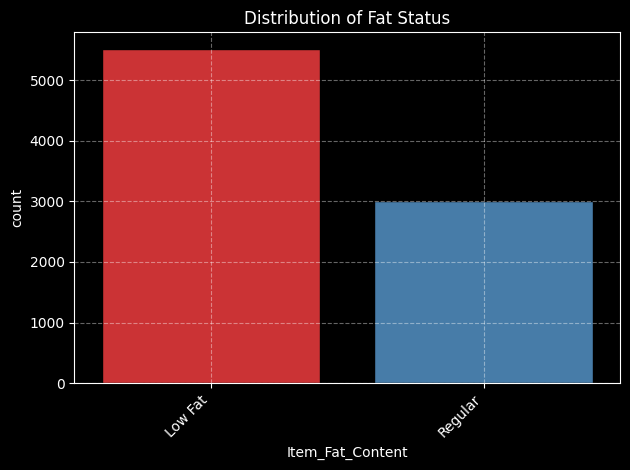

In [ ]:
plt.style.use("dark_background")

ax = sns.countplot(data=df,  x='Item_Fat_Content', edgecolor='black',palette='Set1',hue='Item_Fat_Content')

plt.xticks(rotation=45, ha='right')
ax.set(title='Distribution of Fat Status')
ax.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


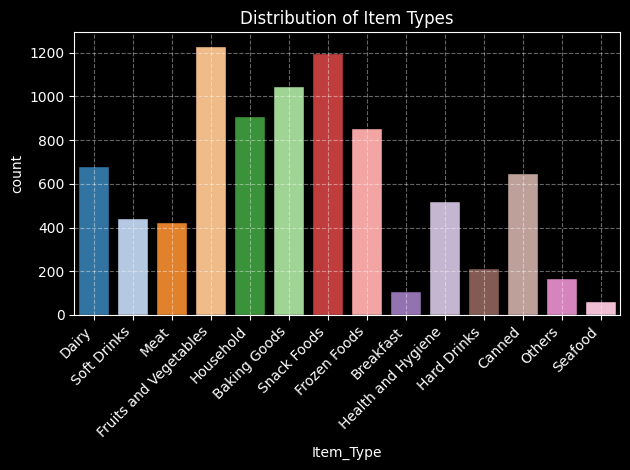

In [ ]:
plt.style.use("dark_background")

ax = sns.countplot(data=df,  x='Item_Type', edgecolor='black',palette='tab20',hue='Item_Type')

plt.xticks(rotation=45, ha='right')
ax.set(title='Distribution of Item Types')
ax.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()





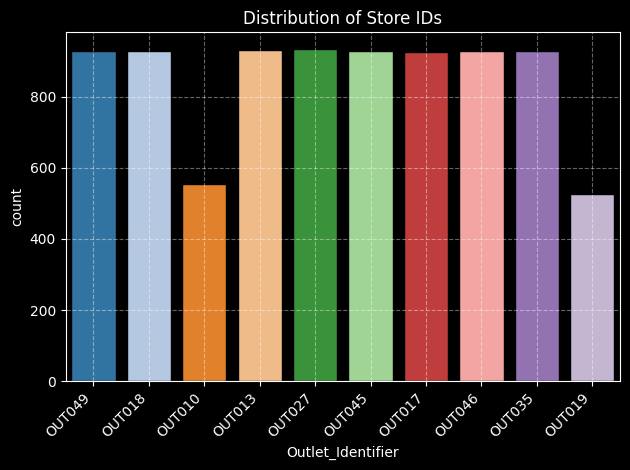

In [ ]:
plt.style.use("dark_background")

ax = sns.countplot(data=df,  x='Outlet_Identifier', edgecolor='black',palette='tab20',hue='Outlet_Identifier')


plt.xticks(rotation=45, ha='right')
ax.set(title='Distribution of Store IDs')
ax.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()




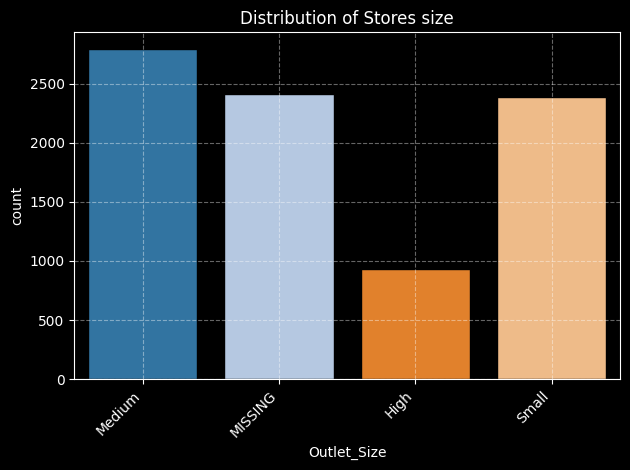

In [ ]:
plt.style.use("dark_background")

ax = sns.countplot(data=df,  x='Outlet_Size', edgecolor='black',palette='tab20',hue='Outlet_Size')




plt.xticks(rotation=45, ha='right')
ax.set(title='Distribution of Stores size')
ax.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


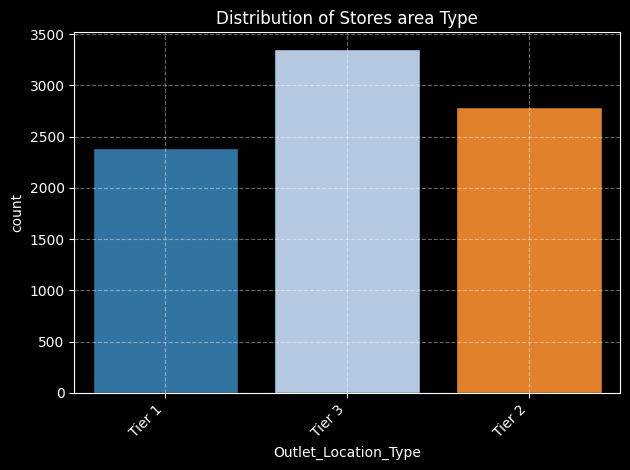

In [ ]:
plt.style.use("dark_background")

ax = sns.countplot(data=df,  x='Outlet_Location_Type', edgecolor='black',palette='tab20',hue='Outlet_Location_Type')


plt.xticks(rotation=45, ha='right')
ax.set(title='Distribution of Stores area Type')
ax.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()



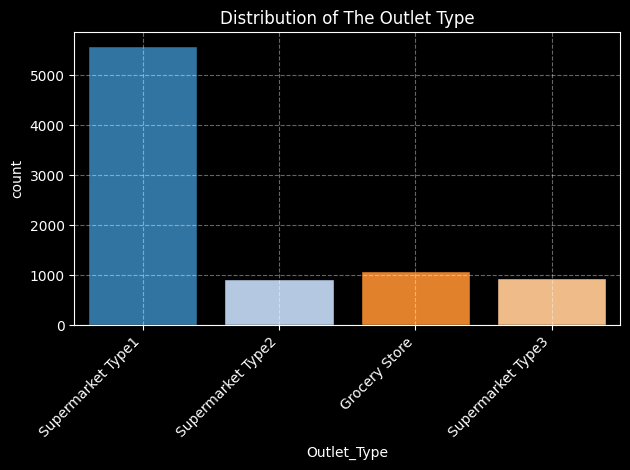

In [ ]:
plt.style.use("dark_background")

ax = sns.countplot(data=df,  x='Outlet_Type', edgecolor='black',palette='tab20',hue='Outlet_Type')


plt.xticks(rotation=45, ha='right')
ax.set(title='Distribution of The Outlet Type')
ax.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()




In [ ]:
correlation= df.corr(numeric_only=True)
correlation.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.08,0.02,0.54,-0.06
Item_Visibility,-0.08,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,0.54,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.06,-0.13,0.57,-0.05,1.00


[Text(0.5, 1.0, 'Heatmap')]

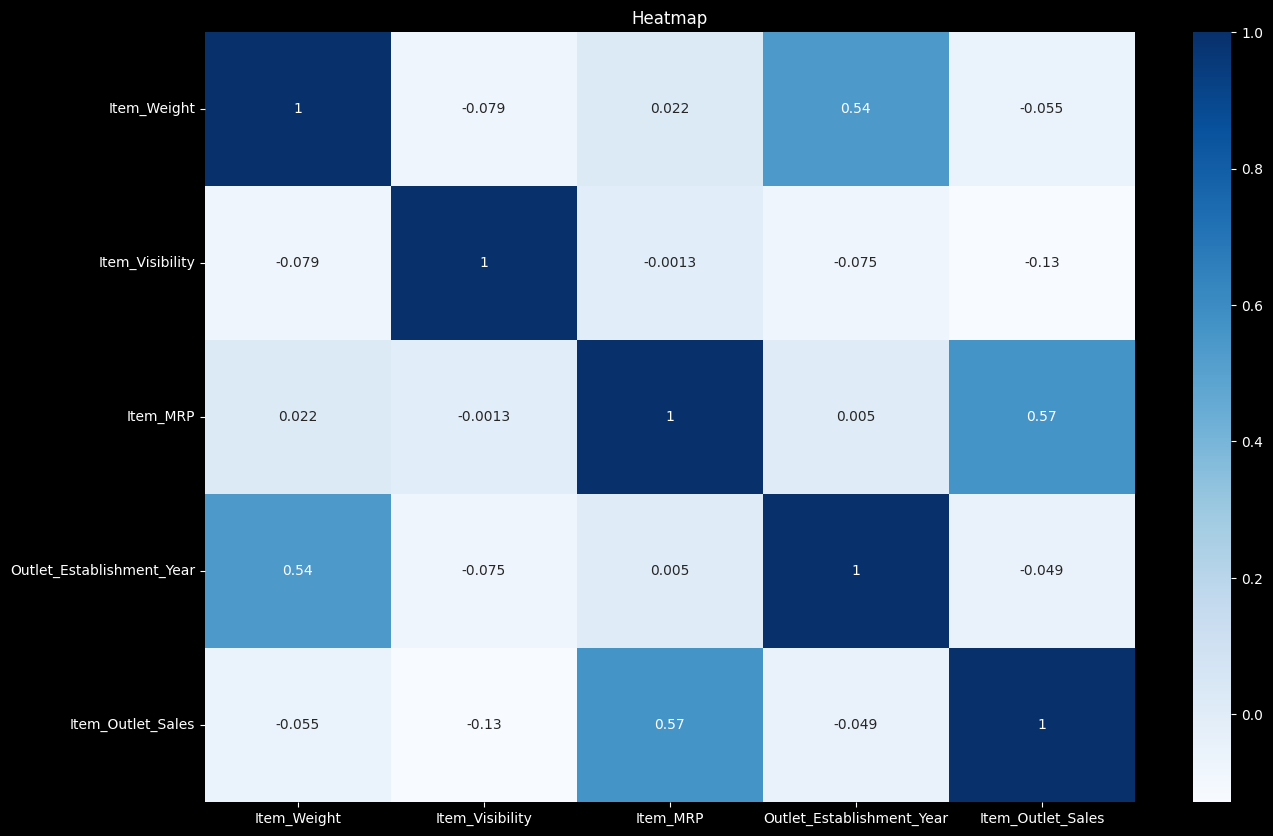

In [ ]:
#plt.style.use('default')
plt.style.use("dark_background")
fig, ax=plt.subplots(figsize=(15,10))
sns.heatmap(correlation, cmap='Blues',annot=True)
ax.set(title='Heatmap')

In [ ]:
df['Item_Outlet_Sales'].describe()

,Item_Outlet_Sales
count,8523.000000
mean,2181.288914
std,1706.499616
min,33.290000
25%,834.247400
50%,1794.331000
75%,3101.296400
max,13086.964800


## Feature Inspection


- To start our Inspection we are going to remove all the placeholder and replacing them with NaN Values

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df = df.replace({"MISSING": np.nan, -1: np.nan})


In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


- Now we can start our Inspection process by inspecting every feature

- The target for out Inspection is the 'Item_Outlet_Sales'


## Explore Categorical Feature Function


In [ ]:

def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):

  plt.style.use("dark_background")


  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order, palette='Set1')
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}")
  ax.grid(True, linestyle="--", alpha=0.5, axis='y')


  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

# Explore Numaric Features Function


In [ ]:
# define the function
def explore_numaric(df,x, figsize=(6,5)):
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100

  gridspec = {'height_ratios': [0.7, 0.3]}
  plt.style.use('dark_background')
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  color = sns.color_palette("Set1")[0]

  sns.histplot(data=df, x=x, ax=axes[0], color=color)
  sns.boxplot(data=df, x=x, ax= axes[1], color=color)
  axes[0].set_title(f'Column : {x}')
  ax.grid(True, linestyle="--", alpha=0.5, axis='y')

  fig.tight_layout()


  plt.show()
# print statment

  print(f'- NaN found: {null_count} ({round(null_perc,2)}%')
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


## Plotting Categorical vs target

In [ ]:
def plot_categorical_vs_target(df, x, y='SalePrice', figsize=(6,4),
                               fillna=True, placeholder='MISSING',
                               order=None, palette='Set2'):
    temp_df = df.copy()

    # Handle missing values
    if fillna:
        temp_df[x] = temp_df[x].fillna(placeholder)
    else:
        temp_df = temp_df.dropna(subset=[x])

    # Dark background style
    plt.style.use('dark_background')

    # Create figure
    fig, ax = plt.subplots(figsize=figsize)

    # Barplot with explicit hue=x to avoid FutureWarning
    sns.barplot(
        data=temp_df, x=x, y=y,
        alpha=0.6, order=order,
        edgecolor='black', errorbar=None,
        palette=palette, hue=x, legend=False, ax=ax
    )

    # Stripplot with same fix
    sns.stripplot(
        data=temp_df, x=x, y=y,
        order=order, hue=x, hue_order=order,
        legend=False, edgecolor='white',
        linewidth=0.5, size=3, zorder=0,
        palette=palette, ax=ax
    )

    # X labels rotation
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Title
    ax.set_title(f'{x} vs. {y}')

    fig.tight_layout()
    return fig, ax

## Plotting Numaric vs Target

In [ ]:
# add **kwargs as keyword when defining function
# include **kwargs in the sns.regplot() within the function

def plot_numaric_vs_target (df, x, y='SalePrice', figsize=(6,4), **kwargs):
  plt.style.use('dark_background')

  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]


  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws = {'edgecolor': 'white', 'linewidths': 1, 'alpha': 0.8}


  sns.regplot(data=df, x=x, y=y, ax=ax ,scatter_kws=scatter_kws,  **kwargs)
  ax.set_title(f'{x} vs. {y} (r = {r})')
  plt.show()


  return fig, ax





## Feature 1: Item_Identifier

**0.Data Dictionary**

 Item_Identifier: Product ID

**1. Univariate Viz**

In [ ]:
feature='Item_Identifier'
df[feature].dtype

dtype('O')

/tmp/ipython-input-805722541.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=temp_df, x=x, ax=ax, order=order, palette='Set1')
/tmp/ipython-input-805722541.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


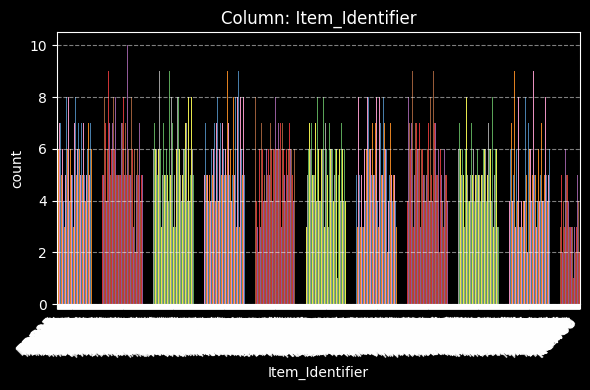

- NaN's Found: 0 (0.0%)
- Unique Values: 1559
- Most common value: 'FDW13' occurs 10 times (0.12%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Item_Identifier'}, xlabel='Item_Identifier', ylabel='count'>)

In [ ]:
explore_categorical(df, feature)

 **2.Feature Observations**


1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values
  - No Null's

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 1559 unique categories.
  - very high cardinality

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - Yes, Very High cardinality.



**3.Multivariate Viz**

/tmp/ipython-input-753101585.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Identifier vs. Item_Outlet_Sales'}, xlabel='Item_Identifier', ylabel='Item_Outlet_Sales'>)

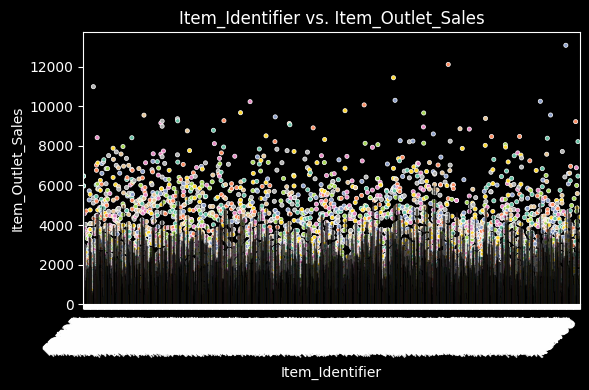

In [ ]:
plot_categorical_vs_target(df, feature,'Item_Outlet_Sales')

**4. Feature vs. Target**
- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - No.
  - Does this feature appear to be a predictor of the target?
    - No.

___

## 2. Item_Weight

**0. Data Dictionary**

 - Item_Weight: Weight of product

**1. Univariate Viz**

In [ ]:
feature = 'Item_Weight'
df[feature].dtype

dtype('float64')

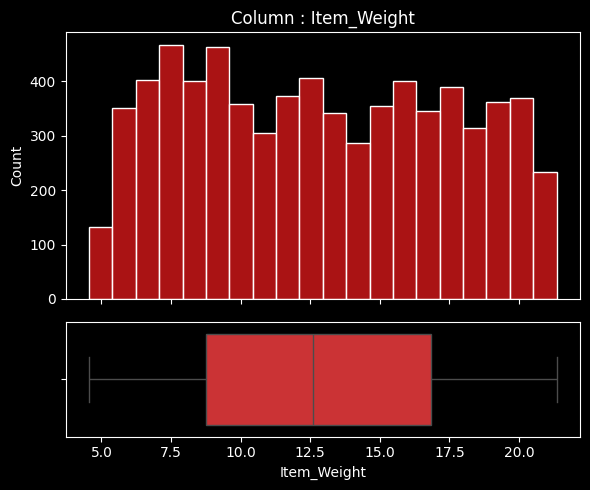

- NaN found: 1463 (17.17%
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column : Item_Weight'}, xlabel='Item_Weight', ylabel='Count'>,
        <Axes: xlabel='Item_Weight'>], dtype=object))

In [ ]:
explore_numaric(df, feature)

**2. Feature Observation**
1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 1463 (17.17%)
  - impute with median.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.

**3. Multivariate Viz**

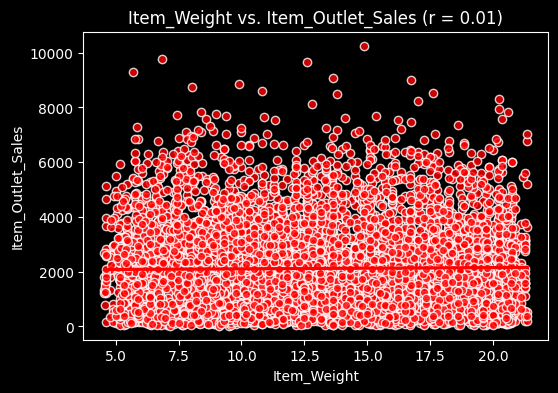

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Weight vs. Item_Outlet_Sales (r = 0.01)'}, xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>)

In [ ]:
plot_numaric_vs_target(df, feature, 'Item_Outlet_Sales', color='red')

**4. Feature Vs Target Observation**

- Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Possibly , I think that there is a relation between the weight of the product and its value.

- Does this feature appear to be a predictor of the target?
    - No, There is almost zero relation between the weight and the Price!

## 3. Item_Fat_Content

**0. Data Dictionary**

- Item_Fat_Content

Whether the product is low-fat or regular

**1. Univariate Viz**

In [ ]:
feature = 'Item_Fat_Content'
df['Item_Fat_Content'].dtype

dtype('O')

/tmp/ipython-input-805722541.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=temp_df, x=x, ax=ax, order=order, palette='Set1')
/tmp/ipython-input-805722541.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


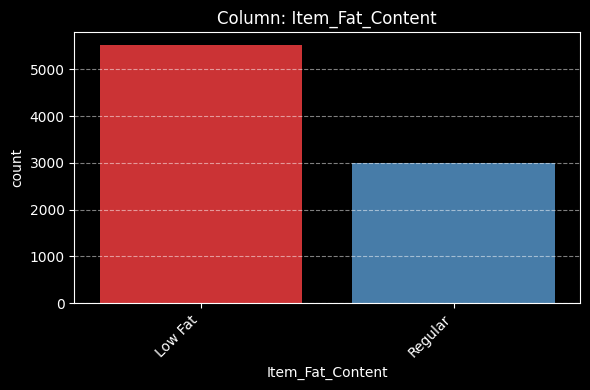

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Item_Fat_Content'}, xlabel='Item_Fat_Content', ylabel='count'>)

In [ ]:
explore_categorical(df, feature)

**2. Feature Observation**


1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - nominal.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Low, 2 Unique Values.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



**3. Multivariate Viz**


/tmp/ipython-input-753101585.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Fat_Content vs. Item_Outlet_Sales'}, xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>)

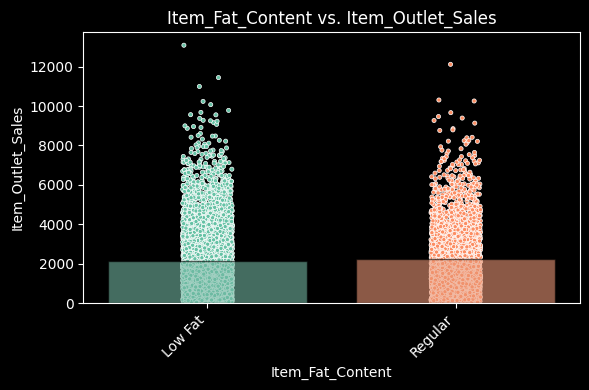

In [ ]:
plot_categorical_vs_target(df, feature,'Item_Outlet_Sales')

**4. Feature Vs Target Observation**

- Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I would assume lower fat would be more expensive.
- Does this feature appear to be a predictor of the target?
    - No, not that much impact!

## 4. Item_Visibility

**0. Data dictionary**
- Item_Visibility:

	The percentage of total display area of all products in a store allocated to the particular product

**1. Univariate Observation**

In [ ]:
feature = 'Item_Visibility'
df[feature].dtype

dtype('float64')

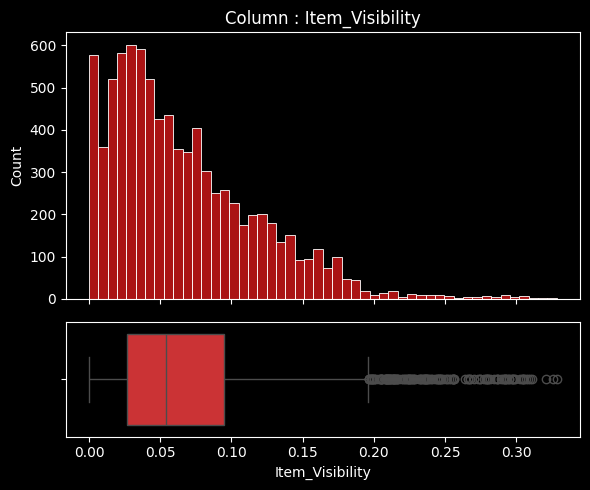

- NaN found: 0 (0.0%
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column : Item_Visibility'}, xlabel='Item_Visibility', ylabel='Count'>,
        <Axes: xlabel='Item_Visibility'>], dtype=object))

In [ ]:
explore_numaric(df, feature)

**2. Feature Observation**


1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numaric.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - numaric, Not applicable.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



**3. Multivariate Viz**


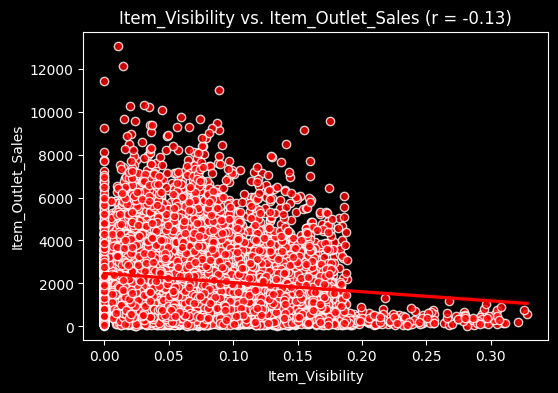

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Visibility vs. Item_Outlet_Sales (r = -0.13)'}, xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>)

In [ ]:
plot_numaric_vs_target(df, feature, 'Item_Outlet_Sales', color='red')

**4. Feature Vs Target Observation**

- Based on your business understanding, would you expect this feature to be a predictor of the target?
    - No.
- Does this feature appear to be a predictor of the target?
    - No, not that much impact!

## 5. Item Type

**0. Data dictionary**
- Item_Type:

	The category to which the product belongs


**1. Univariate Observation**

In [ ]:
feature= 'Item_Type'
df[feature].dtype

dtype('O')

/tmp/ipython-input-805722541.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=temp_df, x=x, ax=ax, order=order, palette='Set1')
/tmp/ipython-input-805722541.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


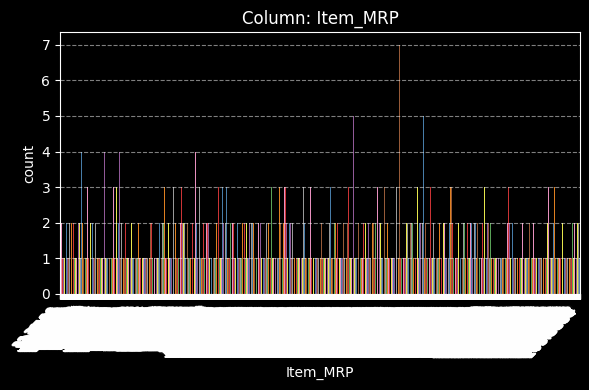

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Item_MRP'}, xlabel='Item_MRP', ylabel='count'>)

In [ ]:
explore_categorical(df, feature)

**2. Feature Observation**


1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - nominal.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - High, 14 Unique Values.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - This Feature may be problematic fro modeling due to high cardinality.



**3. Multivariate Viz**


/tmp/ipython-input-753101585.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Type vs. Item_Outlet_Sales'}, xlabel='Item_Type', ylabel='Item_Outlet_Sales'>)

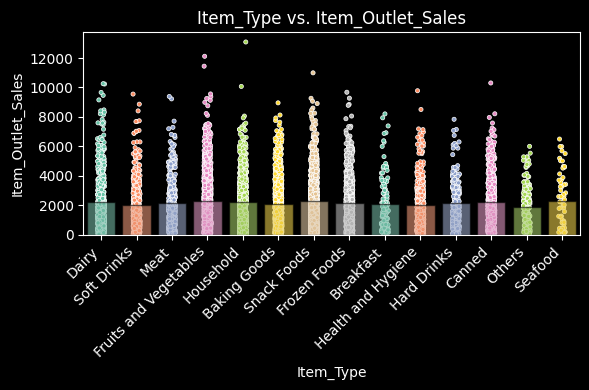

In [ ]:
plot_categorical_vs_target(df, feature, 'Item_Outlet_Sales')

**4. Feature Vs Target Observation**

- Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes. i think that some Types of items are more expensive than others like meat abd seafood are more expensive than Soft Drinks and Breakfast
- Does this feature appear to be a predictor of the target?
    - No, not that much all of the items mean are around the 2000, and !

## 6. Item_MRP

**0. Data dictionary**
- Item_MRP:

	Maximum Retail Price (list price) of the product


- 1.Univariate Observation


In [ ]:
feature = 'Item_MRP'
df[feature].dtype

dtype('float64')

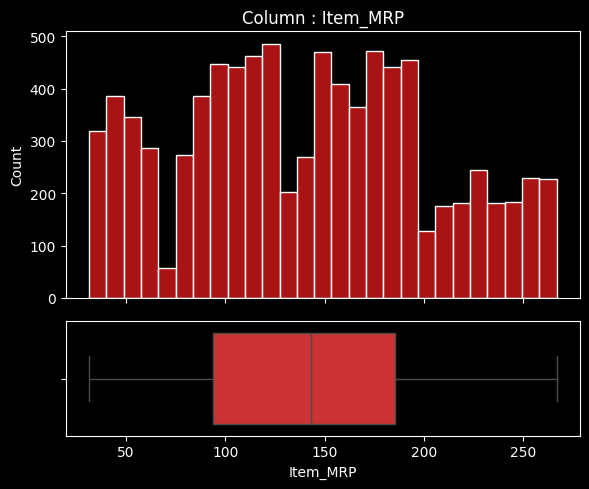

- NaN found: 0 (0.0%
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column : Item_MRP'}, xlabel='Item_MRP', ylabel='Count'>,
        <Axes: xlabel='Item_MRP'>], dtype=object))

In [ ]:
explore_numaric(df, feature)

**2. Feature Observation**


1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numaric.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numaric).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



**3. Multivariate Viz**


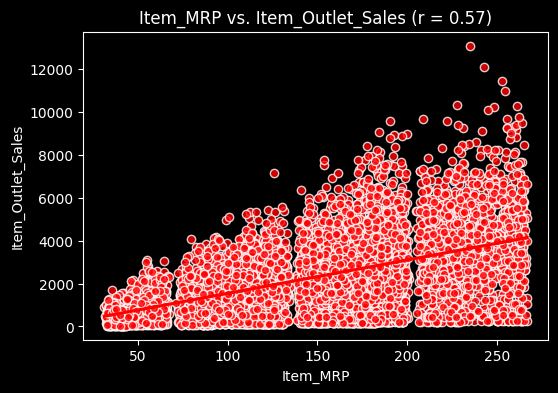

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_MRP vs. Item_Outlet_Sales (r = 0.57)'}, xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>)

In [ ]:
plot_numaric_vs_target(df, feature, 'Item_Outlet_Sales', color='red')

**4. Feature Vs Target Observation**

- Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes. i think that Max Retail Price will be a predictor of the sales.
- Does this feature appear to be a predictor of the target?
    - Yes, we have a moderate Positive correlation (0.57)!

## 7. Outlet_Identifier

**0. Data dictionary**
- Outlet_Identifier:

	Store ID


- 1.Univariate Observation


In [ ]:
feature='Outlet_Identifier'
df[feature].dtype

dtype('O')

/tmp/ipython-input-805722541.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=temp_df, x=x, ax=ax, order=order, palette='Set1')
/tmp/ipython-input-805722541.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


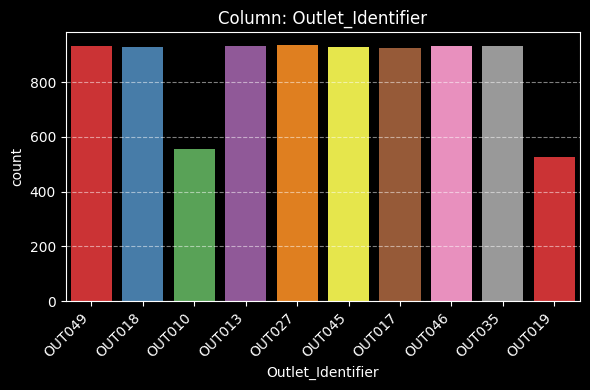

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Outlet_Identifier'}, xlabel='Outlet_Identifier', ylabel='count'>)

In [ ]:
explore_categorical(df, feature)

**2. Feature Observation**


1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - nominal.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - High, Exactly 10.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - High cardinality.



**3. Multivariate Viz**





/tmp/ipython-input-753101585.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Identifier vs. Item_Outlet_Sales'}, xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>)

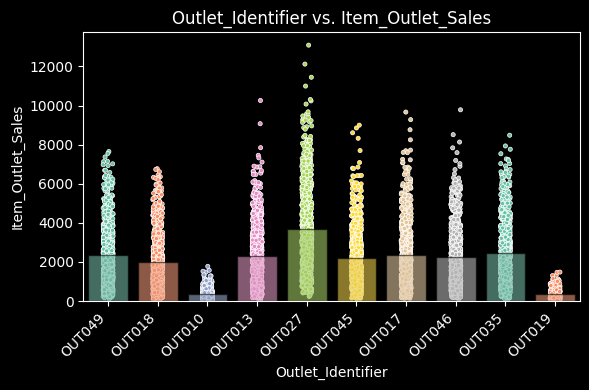

In [ ]:
plot_categorical_vs_target(df, feature, 'Item_Outlet_Sales')

**4. Feature Vs Target Observation**

- Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes. i think that Max Retail Price will be a predictor of the sales.
- Does this feature appear to be a predictor of the target?
    - Yes, we have a moderate Positive correlation (0.57)!

## 8. Outlit_Establishment_Year

**0. Data dictionary**
- Outlet_Establishment_Year:

The year in which store was established



- 1.Univariate Observation


In [ ]:
feature = 'Outlet_Establishment_Year'
df[feature].dtype

dtype('int64')

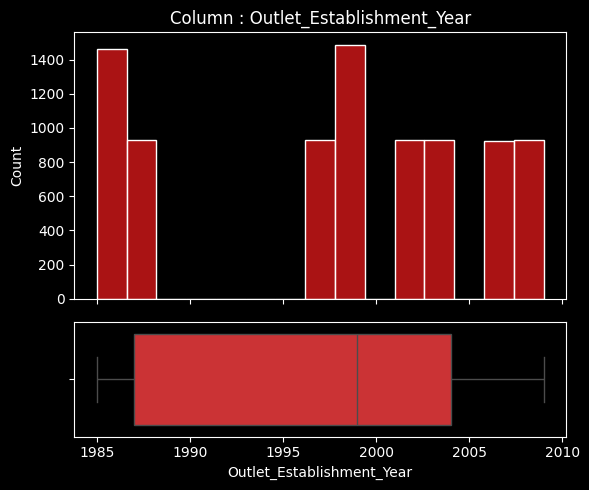

- NaN found: 0 (0.0%
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column : Outlet_Establishment_Year'}, xlabel='Outlet_Establishment_Year', ylabel='Count'>,
        <Axes: xlabel='Outlet_Establishment_Year'>], dtype=object))

In [ ]:
explore_numaric(df, feature)

**2. Feature Observation**


1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numaric.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not Applicable (numaric).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



**3. Multivariate Viz**





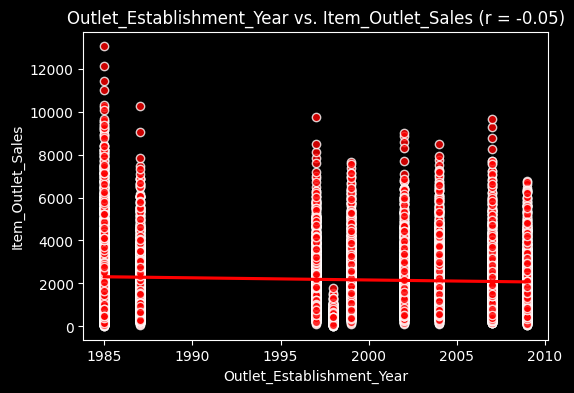

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Establishment_Year vs. Item_Outlet_Sales (r = -0.05)'}, xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>)

In [ ]:
plot_numaric_vs_target(df, feature, 'Item_Outlet_Sales', color='red')

**4. Feature Vs. Target Observation**





- Based on your business understanding, would you expect this feature to be a predictor of the target?
    - No.
- Does this feature appear to be a predictor of the target?
    - No, not that much impact!

## 9. Outlet_Size

**0. Data dictionary**
- Outlet_Size:
The size of the store in terms of ground area covered





- 1.Univariate Observation


In [ ]:
feature = 'Outlet_Size'
df[feature].dtype

dtype('O')

/tmp/ipython-input-805722541.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=temp_df, x=x, ax=ax, order=order, palette='Set1')
/tmp/ipython-input-805722541.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


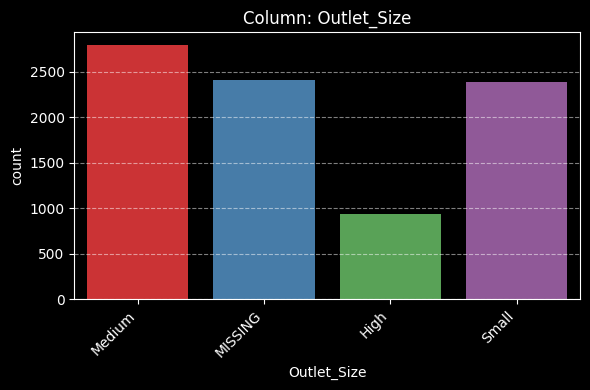

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Outlet_Size'}, xlabel='Outlet_Size', ylabel='count'>)

In [ ]:
explore_categorical(df, feature )

/tmp/ipython-input-805722541.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=temp_df, x=x, ax=ax, order=order, palette='Set1')
/tmp/ipython-input-805722541.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


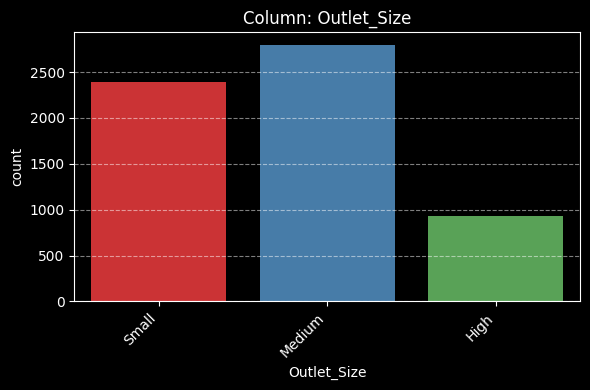

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Outlet_Size'}, xlabel='Outlet_Size', ylabel='count'>)

In [ ]:
# Order is Impotent
qual_order = ['Small' , 'Medium', 'High']
explore_categorical(df, feature , order = qual_order )

**2. Feature Observation**


1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - ordinal.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 2410(28.28%) null values.
  - Impute Mean

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Low, 4.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



**3. Multivariate Viz**





/tmp/ipython-input-753101585.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Size vs. Item_Outlet_Sales'}, xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>)

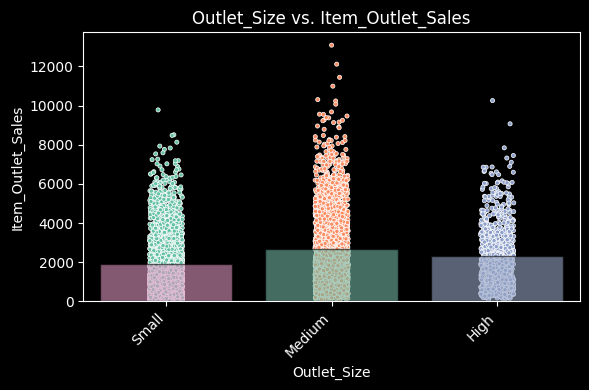

In [ ]:
plot_categorical_vs_target(df, feature, 'Item_Outlet_Sales', order=qual_order)

**4. Feature Vs. Target Observation**





- Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I think there is a relation between the Store size and the sales.
- Does this feature appear to be a predictor of the target?
    - Yes, But not by that much.

## 10. Outlet_Location_Type

**0. Data dictionary**
- Outlet_Location_Type:
The type of area in which the store is located





- 1.Univariate Observation


In [ ]:
feature = 'Outlet_Location_Type'
df[feature].dtype

dtype('O')

/tmp/ipython-input-805722541.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=temp_df, x=x, ax=ax, order=order, palette='Set1')
/tmp/ipython-input-805722541.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


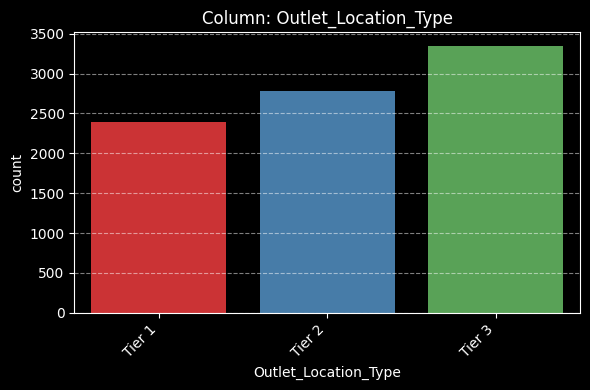

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Outlet_Location_Type'}, xlabel='Outlet_Location_Type', ylabel='count'>)

In [ ]:
qual_order = ['Tier 1' , 'Tier 2', 'Tier 3']

explore_categorical(df , feature, order=qual_order)

**2. Feature Observation**


1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - ordinal.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Low, 3.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



**3. Multivariate Viz**





/tmp/ipython-input-753101585.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Location_Type vs. Item_Outlet_Sales'}, xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>)

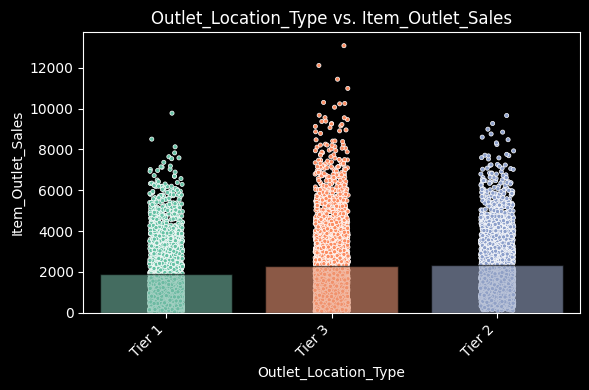

In [ ]:
plot_categorical_vs_target(df, feature, 'Item_Outlet_Sales')

**4. Feature Vs. Target Observation**





- Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I think there is a relation between the Store Location rank and the sales.
- Does this feature appear to be a predictor of the target?
    - Yes, But not by that much.

## 11. Outlet_Type

**0. Data dictionary**
- Outlet_Type:
Whether the outlet is a grocery store or some sort of supermarket





- 1.Univariate Observation


In [ ]:
feature = 'Outlet_Type'
df[feature].dtype

dtype('O')

/tmp/ipython-input-805722541.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=temp_df, x=x, ax=ax, order=order, palette='Set1')
/tmp/ipython-input-805722541.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


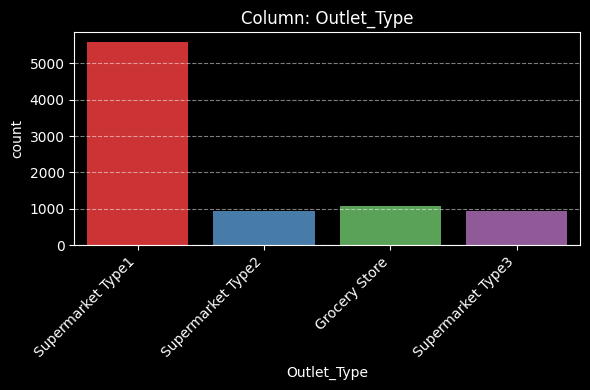

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Outlet_Type'}, xlabel='Outlet_Type', ylabel='count'>)

In [ ]:
explore_categorical(df, feature)

**2. Feature Observation**


1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - nominal.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Low, 4.

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



**3. Multivariate Viz**





/tmp/ipython-input-753101585.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Type vs. Item_Outlet_Sales'}, xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>)

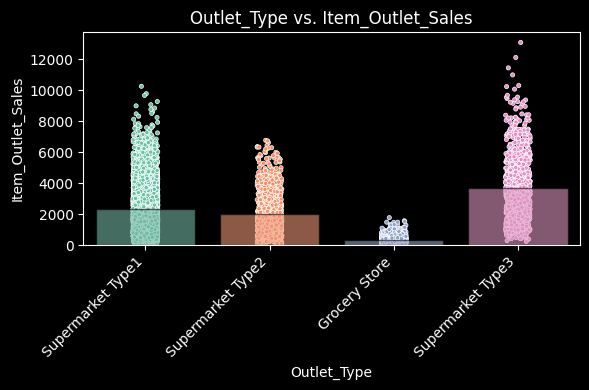

In [ ]:
plot_categorical_vs_target(df, feature, 'Item_Outlet_Sales')

**4. Feature Vs. Target Observation**





- Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I think there is a relation between the Store Type  and the sales.
- Does this feature appear to be a predictor of the target?
    - Yes, some types sold higher than others.